In [1]:
import pandas as pd

benin = pd.read_csv('data/benin_clean.csv')
sierra = pd.read_csv('data/sierraleone_clean.csv')
togo = pd.read_csv('data/togo_clean.csv')

# Add a column to identify the country in each dataset
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)


C:\Users\KIDIST\AppData\Local\Temp\ipykernel_11956\833258552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


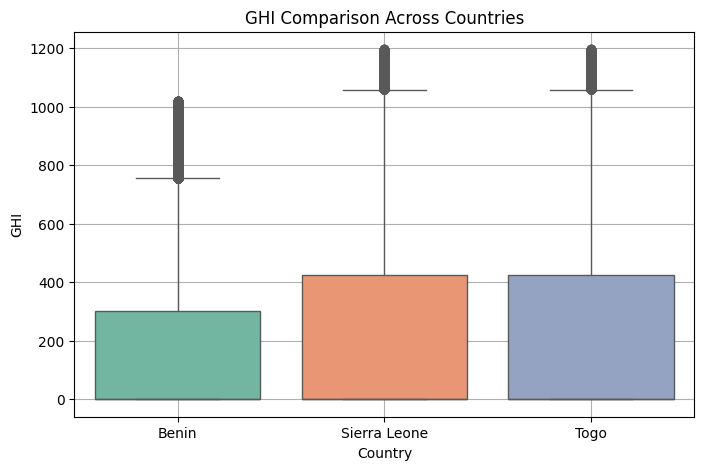

C:\Users\KIDIST\AppData\Local\Temp\ipykernel_11956\833258552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


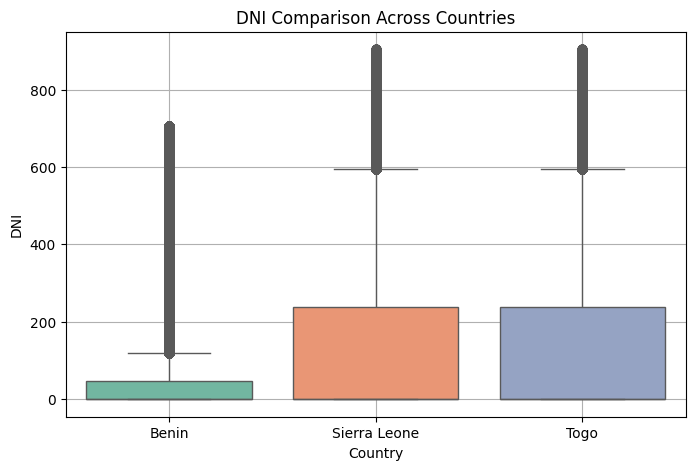

C:\Users\KIDIST\AppData\Local\Temp\ipykernel_11956\833258552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


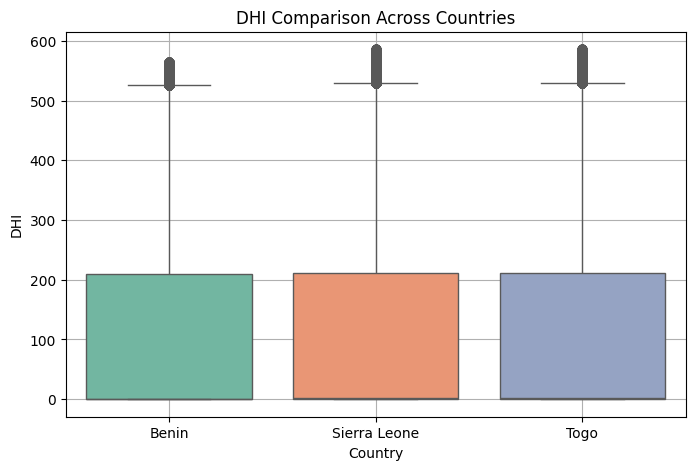

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True)
    plt.show()


In [3]:
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace=True)
summary


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,173.150723,0.0,261.900642,92.762168,0.0,184.552222,106.314220,0.0,148.969336
1,Sierra Leone,225.028731,0.5,316.449213,147.968936,0.0,247.676535,112.777219,1.5,151.567919
2,Togo,225.028731,0.5,316.449213,147.968936,0.0,247.676535,112.777219,1.5,151.567919


summary_df = pd.DataFrame({
 Sierra Leone and Togo exhibit identical mean, median, and standard deviation values across GHI, DNI, and DHI. This may indicate either highly similar solar profiles or potential data duplication.

Benin records the lowest average values for GHI, DNI, and DHI, suggesting it may be the least favorable country among the three for solar energy investment.

While Sierra Leone and Togo share the highest mean GHI (225.03), they also show the highest standard deviation (316.45), pointing to significant variability in solar radiation.
})
display(summary_df)


In [9]:
from scipy.stats import f_oneway

ghi_benin = benin['GHI']
ghi_sierra = sierra['GHI']
ghi_togo = togo['GHI']

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"One-way ANOVA p-value for GHI: {anova_result.pvalue:.5f}")


from scipy.stats import kruskal

# Example for GHI
ghi_kruskal = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"GHI Kruskal-Wallis p-value: {ghi_kruskal.pvalue:.4f}")





One-way ANOVA p-value for GHI: 0.00000
GHI Kruskal-Wallis p-value: 0.0000


GHI Kruskal-Wallis p-value: 0.0000


C:\Users\KIDIST\AppData\Local\Temp\ipykernel_11956\1049425194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


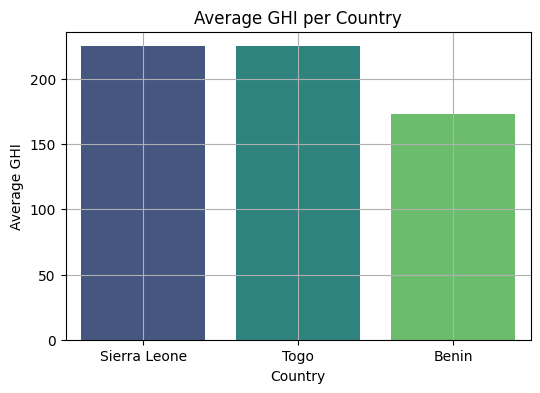

In [5]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title("Average GHI per Country")
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.grid(True)
plt.show()
